<a href="https://colab.research.google.com/github/VeronikaShe/ML-study_HW_1/blob/main/Tree_HW5_Shemyakina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Импорт библиотек

In [62]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

## Получение данных

Будем работать с набором данных для задачи регрессии (целевая переменная - стоимость дома) `california_housing`, который можно получить из стандартных датасетов в `sklearn'e`.

После `fetch_california_housing()` возвращается словарь с данными (`data`), целевой переменной (`target`), названиями характеристик в данных (`feature_names`) и описанием данных (`DESCR`).

In [4]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [181]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [182]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [209]:
X = data.data
features = data.feature_names
y = data.target

Из признаков (характеристик данных) и целевой переменной сформируем датафрейм, в качестве названий колонок возьмем названия признаков.

In [210]:
df = pd.DataFrame(X, columns=features)
df['target'] = y
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [211]:
df.replace('?', np.nan , inplace=True)

In [212]:
df.isna().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
target,0


In [213]:
from sklearn.linear_model import LinearRegression

In [214]:
from sklearn.model_selection import train_test_split

In [215]:
  scaler = StandardScaler()
  X = scaler.fit_transform(X)

In [216]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [217]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [218]:
model.score(X_train, y_train)

0.6125511913966952

In [219]:
model.score(X_test, y_test)

0.5757877060324511

## Обучение дерева решений

Инициализируем дерево решений для задачи регрессии и обучим на признаках (`X`) и целевой переменной (`y`). По признакам модель будет запоминать закономерности, которые ведут к изменению стоимости дома.

In [225]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

Теперь визуализируем наше обученное дерево решений. Узлы (ноды), где находится вопрос - называются вершинами, а где вопросов больше нет - это лист. В каждом узле хранятся объекты и предсказания, которые строятся как среднее по всем объектам, которые попали в этот узел.

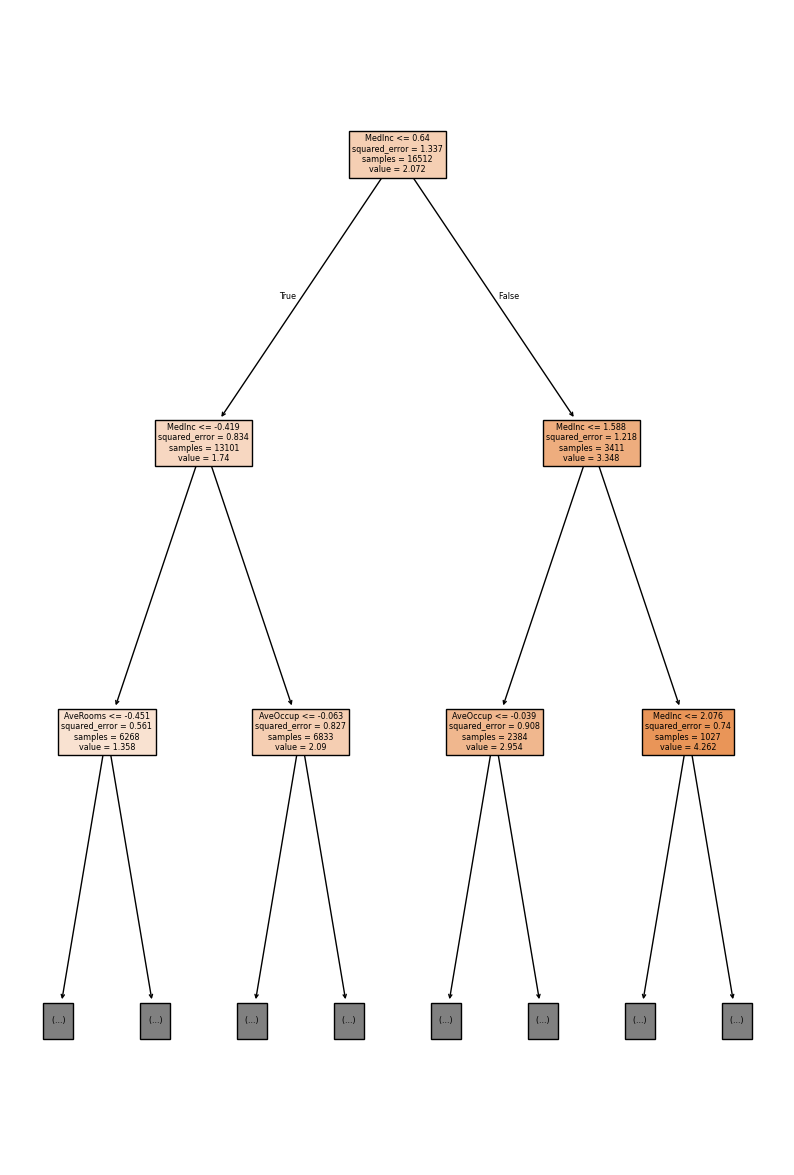

In [241]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 15))
plot_tree(tree, feature_names=features, filled=True, max_depth=2);

In [227]:
tree.score(X_train, y_train)

1.0

In [228]:
tree.score(X_test, y_test)

0.617701889753631

In [238]:
score_list = []
i_list = []
for i in range(1,20,1):
    tree = DecisionTreeRegressor(max_depth=i,random_state=1)
    tree.fit(X_train, y_train)
    score_list.append(tree.score(X_test, y_test))
    i_list.append(i)
score_list, i_list

([0.2795112163463813,
  0.4244060273337802,
  0.5097629887358219,
  0.5540288505085006,
  0.5997321244428706,
  0.620512514623395,
  0.651570068601148,
  0.6776920615714156,
  0.6836601594167977,
  0.67303503056906,
  0.6843484464594638,
  0.6663270056013141,
  0.661172086969062,
  0.6526318051301407,
  0.6508308098186035,
  0.6377749347768861,
  0.6341489368008584,
  0.6271196146600884,
  0.6187381641320282],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [239]:
    tree = DecisionTreeRegressor(max_depth=11,random_state=1)
    tree.fit(X_train, y_train)
    tree.score(X_test, y_test)

0.6843484464594638

## Вывод

a.

Точность модели деревьев решений на тестовой выборке = 0.6843484464594638
с учетом оптимизации глубины дерева, т.е. при max_depth=11

Точность модели линейной регресси на тестовой выборке = 0.5757877060324511


Модель деревьев решений оказалась более точной.


b.

Линейную регрессию необходимо использовать, когда целевая переменная (то, что в модели мы хотим предсказать) линейно зависит от признаков.

Плюсы:
- Скорость и простота получения модели.

- Интерпретируемость модели. Линейная модель является прозрачной и понятной для аналитика. По полученным коэффициентам регрессии можно судить о том, как тот или иной фактор влияет на результат, сделать на этой основе дополнительные полезные выводы.

Минусы:

- Не может уловить сложные зависимости в данных.

- Проблемы с мультиколлинеарностью.


Деревья решений необходимо использовать, когда большинство признаков - категориальные и необходимо наглядным образом интерпретировать модель.

Плюсы:
- Легкая интерпретация и визуализация

- Простота подготовки данных: dummy-переменные, возможны пропуски, не требуется нормализация

- Быстрая скорость построения

- Чёткие и понятные извлекаемые правила. Деревья способны генерировать извлекаемые правила в областях, где специалисту трудно формализовать свои знания

Минусы:

- Проблема переобучения

- Чувствительность к несбалансированным классам

- Неустойчивость, или чувствительность к шумам во входных данных.

- Хорошая интерполяция, плохая экстраполяция